# Neural Networks

Neural networks are the basic building blocks of deep learning algorithms. A neural network is a type of machine learning algorithm designed to simulate the behaviour of the human brain. It is made up of interconnected nodes, also known as artificial neurons, organised into layers.

Neural networks are a type of machine learning algorithm, but they differ from traditional machine learning in several key ways. Most importantly, neural networks learn features directly from the data, making them better suited to large datasets. On the other hand, in traditional machine learning, features are provided manually.

The basic element of a neural network is a neuron. Neurons are organised into layers, which can be stacked one on top of the other. The first layer is the input layer, the last layer is the output layer, and each layer in between is called a hidden layer.

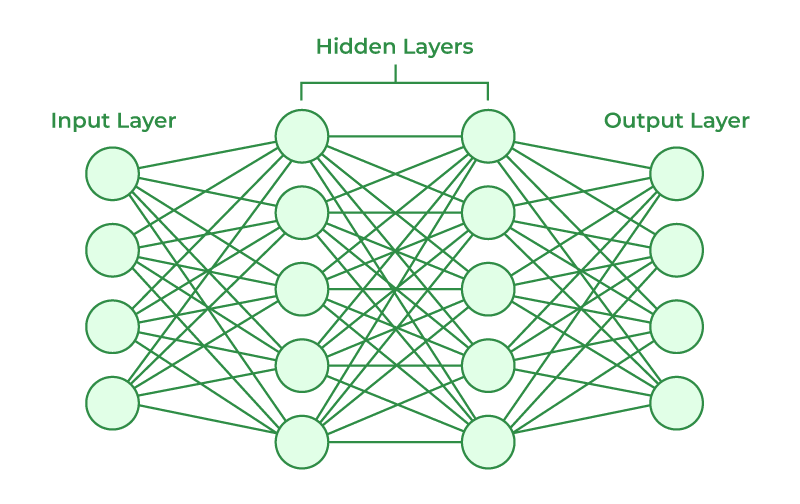



The basic functioning of a Neural Network is the following:



1.   Fed input data into the network.
2.   Flow data layer by layer from input to output.
3.   Calculate the error of the network based on the computed output.
4.   Adjust the weights according to the gradient.
5.   Iterate until convergence / stopping criteria

# 🧠 Linear layer

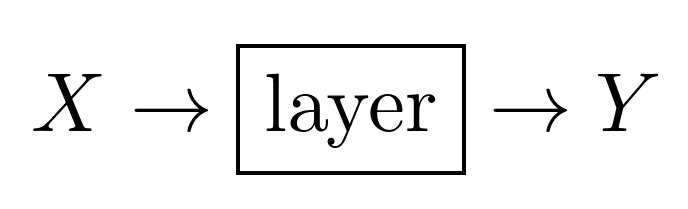

Regardless of the architecture of the layers, each layer in a neural network should give an output ($Y$) given an input ($X$). In this section we will discuss the simplest possible layer, which implements a linear function:

$Y = W * X + B$, where $W$ and $B$ are the learnable parameters of the layers: weights and biases.

This kind of layer is the basic building block of a Feed Forward Neural Network.

Senza l'activation function, la rete non è altro che una composizione di operazioni lineari, è la funzione di attivazione che inserisce la non-linearità

In [2]:
%pip install matplotlib 

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 5.6 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 7.5 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 8.9 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 8.6 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 7.5 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------ --------------------- 1.0/2.3 MB 6.3 MB/s eta 0:00:01
   -------------------------------- ------- 1.8/2.3 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import matplotlib.pyplot as plt

### 🔢 Coding

In [4]:
class FCLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(input_size, output_size)
        self.bias = np.random.randn(1, output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias

In [7]:
example = np.random.randn(100, 10)

layer_prova = FCLayer(10, 1)
out = layer_prova.forward(example)

for i in range(10):
  print("Input = ", example[i], " - Output = ", out[i])
  print()

Input =  [ 0.07764582 -0.80506586 -0.56822466  0.99438343 -0.06052033 -1.17372467
  1.84841736 -1.18749493 -2.14531923  0.32694925]  - Output =  [0.10238652]

Input =  [ 0.13994663  0.20181974 -0.04475895  1.47482989  2.42389276  0.04312293
  0.08491344  0.28826179 -0.95191117 -0.50365044]  - Output =  [6.64240803]

Input =  [-0.24246423 -2.55178473  0.57521844  0.81495942 -0.14202064  0.51528746
 -0.10266939 -0.99951225 -1.87177416  0.93370923]  - Output =  [-3.61687797]

Input =  [-1.43320444 -0.33967913  0.43338277 -0.02574441  0.01622218  0.09018952
  0.11706744 -0.41532665 -0.27487094 -1.51601551]  - Output =  [-1.49893584]

Input =  [ 1.30585778 -1.50190097 -0.93766353  0.55168864  0.9910466   0.1298656
  0.89845939 -0.38379067  0.14615858  1.54816669]  - Output =  [2.82758389]

Input =  [-0.118012   -1.95955433  1.42987455 -1.38501398 -0.06200471 -0.60378087
 -0.07808636  0.91924051  0.56317108  0.01593376]  - Output =  [-1.26418009]

Input =  [-0.79897236 -0.12725222 -0.0607386

### 📊 Plot

Plot the output with respect to the input: it follow a linear shape.

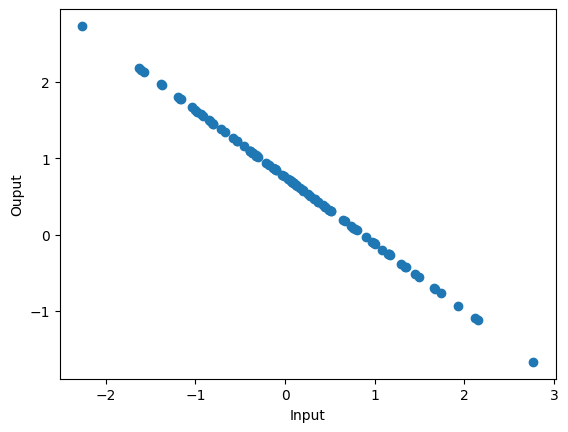

In [8]:
example = np.sort(np.random.randn(100, 1))
layer = FCLayer(1, 1)
out = layer.forward(example)

out_ordered = layer.forward(example)
plt.scatter(example, out_ordered)
plt.xlabel("Input")
plt.ylabel("Ouput")
plt.show()

# 📈 Activation functions

Activation functions **introduce non-linearities into the process**. There are many different activation functions in the literature. Usually, some of the functions are mainly used in the hidden layers and some of them for the output layers.

The activation function usually depends on the task, specially for the output layer.
In the hidden layers most of the times ReLU is used, sometimes tanh

In this section we introduce three of them:

*   $ReLU(x) = max(0,x)$
*   $tanh(x) = \frac{e^x - e^{-x}}{e^x+e^{-x}}$
*   $sigmoid(x) = \frac{1} {1 + x}$



In [9]:
import numpy as np
import matplotlib.pyplot as plt

### 🔢 Coding: add the activation function to the layer 🧠📈



In [10]:
class FCLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(input_size, output_size)
        self.bias = np.random.randn(1, output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias

In [11]:
class ActivationLayer:
    def __init__(self, activation):
        self.activation = activation

    def forward(self, input):
        self.input = input
        return self.activation(input)

### 🔢 Coding: activation functions 📈


In [12]:
def relu(x):
    return np.maximum(x, 0)

def tanh(x):
    return np.tanh(x)

def sigmoid(x):
    v = np.nan_to_num(np.exp(-x))
    return 1 / (1 + v)

### 📊 Plot

Plot the shape of the different activation functions.

Il fatto che ReLU sia appiattita completamente prima di 0 potrebbe creare problemi spegnendo troppi neuroni. (per questo motivo esistono altre funzioni tipo Leaky ReLU)

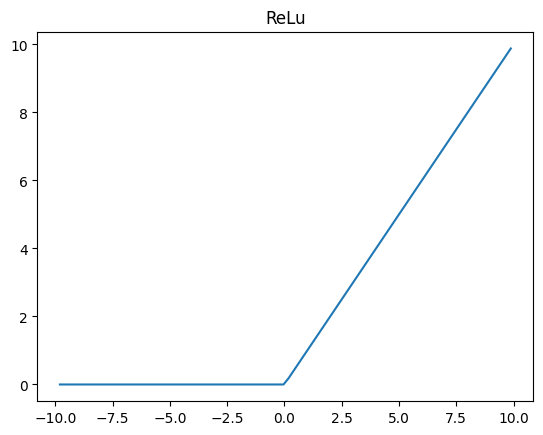

In [13]:
x = np.random.uniform(-10, +10, 100)

x = np.sort(x)

plt.plot(x, relu(x))
plt.title("ReLu")
plt.show()

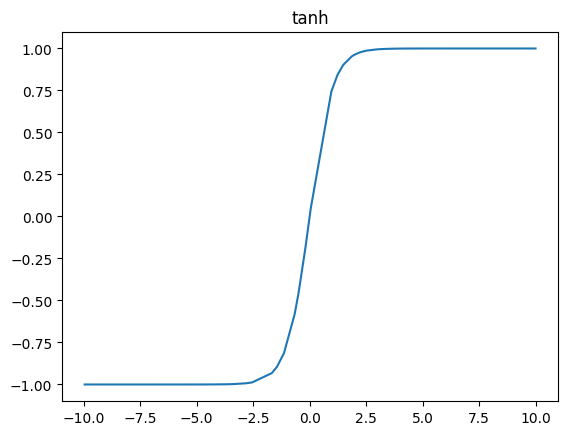

In [14]:
x = np.random.uniform(-10, +10, 100)
x = np.sort(x)
plt.plot(x, tanh(x))
plt.title("tanh")
plt.show()

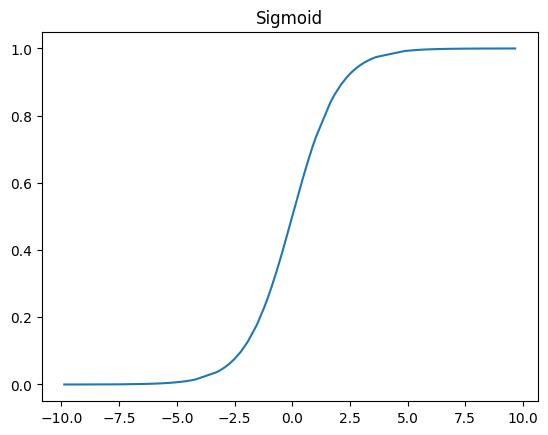

In [15]:
x = np.random.uniform(-10, +10, 100)

x = np.sort(x)

plt.plot(x, sigmoid(x))
plt.title("Sigmoid")
plt.show()

### ❗ Pay attention to the y-axis of the two functions!

andando verso valori alti di x ReLU è l'unica che non si appiattisce tra queste funzioni, questo migliora il problema dell'annullamento del gradiente

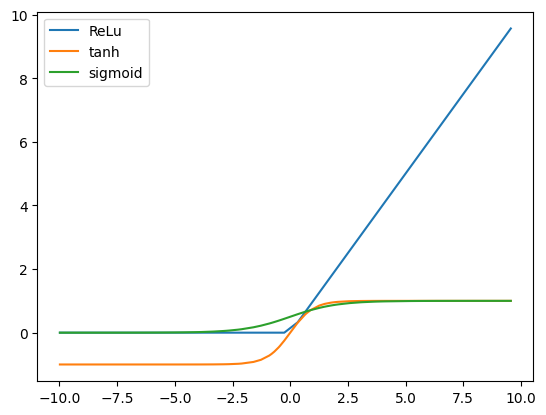

In [16]:
x = np.random.uniform(-10, +10, 100)

x = np.sort(x)

plt.plot(x, relu(x), label="ReLu")
plt.plot(x, tanh(x), label="tanh")
plt.plot(x, sigmoid(x), label="sigmoid")
plt.legend()
plt.show()

In [18]:
example = np.random.randn(100, 10)

linear_layer = FCLayer(10, 1)
act_function = ActivationLayer(relu)

out = linear_layer.forward(example)
out = act_function.forward(out)

for i in range(10):
  print("Input = ", example[i], " - Output = ", out[i])
  print()

Input =  [-0.11988595 -1.95867079  1.31325657 -0.90149694 -0.16872472  0.38833529
 -1.63319651 -0.77266885 -0.73293831  0.79332041]  - Output =  [0.]

Input =  [-0.48487449  0.24919657 -0.44236953 -1.11978559 -0.54508567 -0.24771745
  0.75403467  0.55959254 -1.49924778  1.87698842]  - Output =  [0.]

Input =  [ 0.15567699 -0.01855932 -0.3729828  -0.30846421  0.41201994  2.03712153
  1.29017511 -0.44946391  1.25249128 -0.87529857]  - Output =  [0.]

Input =  [ 1.01206925 -0.48391529  0.19133348 -0.4029395  -0.99471666 -0.79478132
 -0.83017873  0.51677113  0.34095734  0.44036365]  - Output =  [1.10438197]

Input =  [ 0.88926613 -0.93208949 -0.45121074  1.3819965  -0.37344261  0.72906763
 -1.87202985  1.31562953 -0.09765673 -1.04599644]  - Output =  [0.]

Input =  [ 0.33922751 -0.82494834  1.0611757  -1.19822216 -0.47429793  0.53408243
 -0.44240781 -0.42573301 -1.23850134  0.2519194 ]  - Output =  [0.39389996]

Input =  [-0.2556757  -0.0761298   0.63188316  0.13570386 -0.70476231 -0.19378

### 📊 Plot

Plot the results of a single layer to see the shape of the output with respect to the input.

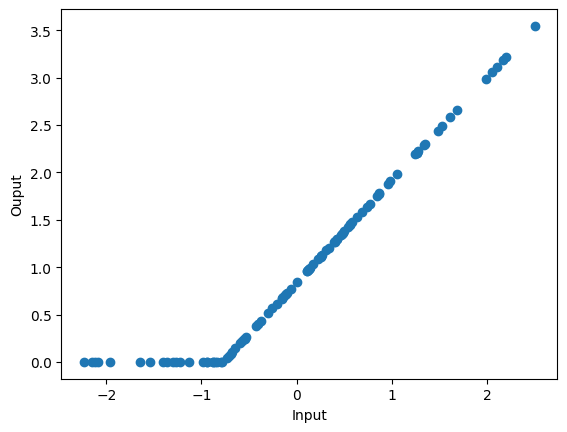

In [26]:
example = np.random.randn(100, 1)
layer = FCLayer(1, 1)
act_function = ActivationLayer(relu)

out = layer.forward(example)
out = act_function.forward(out)

plt.scatter(example, out)
plt.xlabel("Input")
plt.ylabel("Ouput")
plt.show()

# 🍔 Stack multiple layers

The easiest way to increase the expressivity of the network, especially when dealing with complex data, is to build the network as a combination of the following layers.
When do so, each neuron of one layer is connected to each neuron of the following layer.
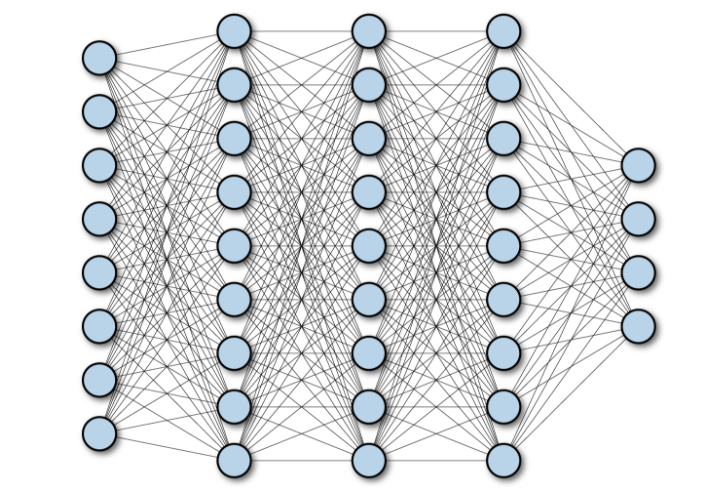

The output of one layer is the input of the following layer, this idea is known as: **Forward Step**.

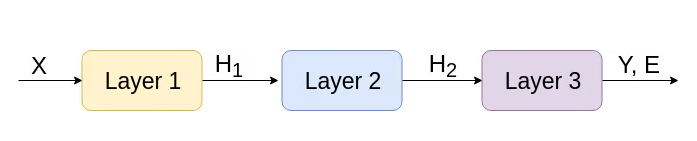

In this section we will create a Neural Network as combination of multiple layers with different activation function and the output of the network changes.

Il potere del network è dato dalla compbinazione di funczioni di attivazione non lineari e la combinazione di più layer nella  rete.

### Useful functions

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
class FCLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(input_size, output_size)
        self.bias = np.random.randn(1, output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias

class ActivationLayer:
    def __init__(self, activation):
        self.activation = activation

    def forward(self, input):
        self.input = input
        return self.activation(input)

def relu(x):
    return np.maximum(x, 0)
def tanh(x):
    return np.tanh(x)

### 🔢 Coding: Neural network class 🍔

In [29]:
class Network():
  def __init__(self):
        self.layers = []

  def add(self, layer):
      self.layers.append(layer)

  def predict(self, input_data):
      samples = len(input_data)
      result = []

      for i in range(samples):
          output = input_data[i]
          for layer in self.layers:
              output = layer.forward(output)
          result.append(output)

      return result

Standard: Utilizzare layer con numeri in potenza di 2

In [32]:
example = np.random.randn(100, 64)

network = Network()

network.add(FCLayer(64, 32))
network.add(ActivationLayer(relu))
network.add(FCLayer(32, 16))
network.add(ActivationLayer(relu))
network.add(FCLayer(16, 1))
network.add(ActivationLayer(relu))

out = network.predict(example)

for i in range(10):
  print("Input = ", example[i], " - Output = ", out[i])
  print()

Input =  [ 0.11215028 -0.92835347  1.13762103  0.66486848 -0.98097274 -1.17447922
  0.57521634  1.80569408 -0.50910309 -0.53392591 -1.6851836   0.11862602
  0.5640648  -1.03075801  0.37708973  1.81204645  1.25763137 -0.54686281
 -0.11734133  0.76270093  1.99079611 -0.90819887  1.60402186  0.78863914
  2.02849086 -0.47639784 -0.41294121 -0.1709162   0.95919269 -1.27879648
  0.06799621 -1.52823054  0.46667716 -1.13189852  0.03710843  0.77222225
  0.62599568  0.86146572 -0.82225719 -0.15648992  0.43056152 -0.48203779
 -0.76157059 -0.89320561 -0.43092959  1.08728237 -1.80870685  0.32264637
  0.80462958 -0.65730305 -0.10357824 -0.3924061  -1.34266313  1.37882105
 -0.02256075  0.19716828  0.77357415 -1.32720197  0.27868389  0.49969932
 -1.04519362 -1.68238761 -1.20394265  0.52392443]  - Output =  [[0.]]

Input =  [-0.12257624  0.16834987 -1.00996168 -0.24327746  0.75235878  0.06831547
  0.13500084  1.21183046 -1.10082189 -2.06782751  0.20203879  0.48673058
 -1.9100876  -1.57454881 -0.9522508

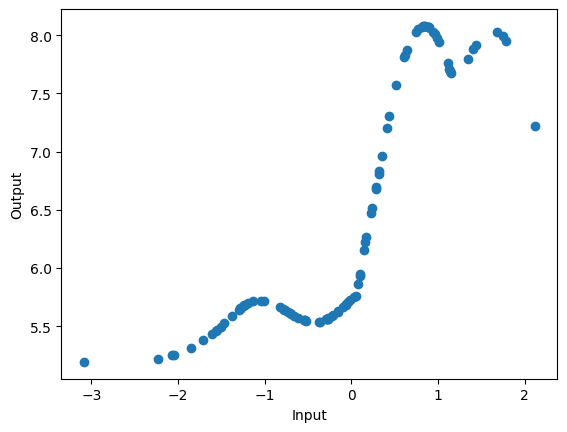

In [33]:
example = np.random.randn(100, 1)

network = Network()

network.add(FCLayer(1, 8))
network.add(ActivationLayer(relu))
network.add(FCLayer(8, 16))
network.add(ActivationLayer(tanh))
network.add(FCLayer(16, 1))
network.add(ActivationLayer(relu))

out = network.predict(example)

plt.scatter(example, out)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

# 🏋 Train the Network (1): Backpropagation

Once the network is defined, the next step is to **train it**.  
The algorithm that enables efficient training of larger networks is called **backpropagation**. It leverages the chain rule of calculus to compute gradients of the network’s parameters efficiently.

---

## 📉 Part 1: Gradient Descent

The weights of the network are updated based on the **gradient of the loss function** with respect to the parameters. Formally:  


$w \leftarrow w - \alpha \frac{\partial L}{\partial w}$

Where:  
* ($w$) are the learnable parameters of the network.  
* ($\alpha$) is the **learning rate**, controlling the step size.  
* ($\frac{\partial L}{\partial w}$) is the derivative of the loss function with respect to the weights.

Gradient descent ensures that the network parameters move in the direction that **reduces the error**.

## ⬅ Part 2: Backpropagation

To perform gradient descent, we need ($\frac{\partial L}{\partial w}$) for all weights.  
Computing this directly for a multi-layer network is complex, so it's broken down into smaller steps.

### Given:
* Input: ($X$)  
* Weights: ($W$)  
* Activation function: ($\sigma$)  
* Output: ($\hat{y}$)  
* Loss function: ($L(y, \hat{y})$)


### Step 1: Forward Pass

For each layer ($l$), the forward pass computes:


$z^{[l]} = W^{[l]} a^{[l-1]} + b^{[l]}, \quad a^{[l]} = \sigma(z^{[l]})$

For the last layer ($L$), the output is:


$\hat{y} = a^{[L]} = \sigma(W^{[L]} a^{[L-1]} + b^{[L]})$


### Step 2: Backward Pass

#### Step 2.1: Gradient of the Output Layer

For the last layer ($L$):


$\delta^{[L]} = \frac{∂ L}{\partial z^{[L]}} = \frac{\partial L}{\partial a^{[L]}} \odot \sigma'(z^{[L]})$

Where ($\odot$) is the element-wise product.

#### Step 2.2: Gradients of Weights and Biases (Last Layer)

$\frac{\partial L}{\partial W^{[L]}} = \delta^{[L]} (a^{[L-1]})^T, \quad \frac{\partial L}{\partial b^{[L]}} = \delta^{[L]}$

#### Step 2.3: Backpropagation for Hidden Layers

For each layer ($l = L-1, L-2, \dots, 1$):

$\delta^{[l]} = (W^{[l+1]})^T \delta^{[l+1]} \odot \sigma'(z^{[l]})$

Intuition:  
* ($W^{[l+1]})^T \delta^{[l+1]}$) propagates the gradient from the following layer.  
* $(\sigma'(z^{[l]})$) accounts for the derivative of the activation function in the current layer.

## 💡 TL;DR

The training of the network is performed according to a rule called Backpropagation. There are two main ingredients that allow the application of the backpropagation: the gradient descent algorithm and the chain rule of the derivatives.

### Gradient Descent

Gradient descent is an optimization algorithm used to minimize a model’s loss function, the measure of how wrong the network’s predictions are.

It works by iteratively adjusting the model’s parameters (weights and biases) in the opposite direction of the gradient (slope) of the loss with respect to those parameters.

The basic update rule is: $\Theta ← Θ- η\frac{\partial L}{∂Θ}$, where $Θ$ are the model parameters, $\eta$ is the learning rate and $\frac{\partial L}{∂Θ}$ is the gradient of the loss function with respect to the parameters of the network (= the first derivative of the loss function with respect to the parameters of the network).

This process gradually moves weights parameters to reduce the loss of the network.

### Chain Rule

The *second main ingredient* for optimizing neural networks is the chain rule from calculus. Basically, it **allows the computation of the derivative of compositions of functions** (= in the context of neural networks we have multiple sequential layers that at the end represent a composition of functions).

Simple example (given $y = f(g(x))$) $ ⇒ \frac{\partial x}{\partial y} = \frac{\partial y}{\partial g} * \frac{\partial g}{\partial x}$.

In deep learning, this means we can compute how changes in parameters in earlier layers affect the final loss by propagating gradients backward through each layer using the chain rule.

### Backpropagation

Backpropagation is the computational implementation of the chain rule in neural networks.

Steps:

* Forward pass: input data flows through the network to compute predictions and the loss.
* Backward pass: using the chain rule, compute gradients of the loss with respect to each parameter, starting from the output layer and moving backward.
* Update parameters: apply gradient descent to update weights and biases using the computed gradients.

In [34]:
import numpy as np

In [ ]:
# activation functions and its derivative
def relu(x):
    return np.maximum(x, 0)

def tanh(x):
    return np.tanh(x)

# prime = Derivata
def tanh_prime(x):
    return 1-np.tanh(x)**2

def relu_prime(x):
    return np.maximum(x, 0)

def sigmoid(x):
    v = np.nan_to_num(np.exp(-x))
    return 1 / (1 + v)

def sigmoid_prime(x):
    v = np.nan_to_num(np.exp(-x))
    return v / (1 + v)**2

#loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

### 🔢 Coding: add backward step

In [38]:
class FCLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(input_size, output_size)
        self.bias = np.random.randn(1, output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias

    def backward(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)

        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

class ActivationLayer:
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(input)

    def backward(self, output_error, learning_rate):
      return output_error * self.activation_prime(self.input)
class Network():
  def __init__(self):
        self.layers = []

  def add(self, layer):
      self.layers.append(layer)

  def set_loss(self, loss, loss_prime):
      self.loss = loss
      self.loss_prime = loss_prime

  def predict(self, input_data):
      samples = len(input_data)
      result = []

      for i in range(samples):
          output = input_data[i]
          for layer in self.layers:
              output = layer.forward(output)
          result.append(output)

      return result

  def fit(self, x_train, y_train, epochs, learning_rate):
        samples = len(x_train)

        for i in range(epochs):
            err = 0
            for j in range(samples):
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward(output)          # Forward function for each layer

                err += self.loss(y_train[j], output)        # compute the difference between output and desired output

                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward(error, learning_rate)        # backpropagation

            err /= samples
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))

In [43]:
%pip install keras tensorflow

   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 1.3/331.9 MB 6.7 MB/s eta 0:00:50
   ---------------------------------------- 2.6/331.9 MB 6.6 MB/s eta 0:00:51
    --------------------------------------- 4.2/331.9 MB 6.6 MB/s eta 0:00:50
    --------------------------------------- 5.2/331.9 MB 6.5 MB/s eta 0:00:51
    --------------------------------------- 6.6/331.9 MB 6.3 MB/s eta 0:00:52
    --------------------------------------- 8.1/331.9 MB 6.3 MB/s eta 0:00:52
   - -------------------------------------- 9.2/331.9 MB 6.4 MB/s eta 0:00:51
   - -------------------------------------- 10.5/331.9 MB 6.2 MB/s eta 0:00:53
   - -------------------------------------- 11.3/331.9 MB 5.9 MB/s eta 0:00:55
   - -------------------------------------- 12.3/331.9 MB 5.8 MB/s eta 0:00:55
   - -------------------------------------- 13.4/331.9 MB 5.7 MB/s eta 0:00:57
   - -------------------------------------- 14.7/331.9 MB 5.7 MB/s 


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from keras.datasets import mnist
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
y_train = to_categorical(y_train)

x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test)

net = Network()
net.add(FCLayer(28*28, 100))
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(100, 50))
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(50, 10))
net.add(ActivationLayer(sigmoid, sigmoid_prime))

net.set_loss(mse, mse_prime)     # Could be changed, MSE's usually used in regression tasks, but we're working on classification
net.fit(x_train[0:1000], y_train[0:1000], epochs=35, learning_rate=0.001)

out = net.predict(x_test[0:3])
print("\n")
print("predicted values : ")
print(out, end="\n")
print("true values : ")
print(y_test[0:3])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3288\2564748183.py:15: RuntimeWarning: overflow encountered in exp
  v = np.nan_to_num(np.exp(-x))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3288\2564748183.py:19: RuntimeWarning: overflow encountered in exp
  v = np.nan_to_num(np.exp(-x))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3288\2564748183.py:20: RuntimeWarning: overflow encountered in square
  return v / (1 + v)**2


epoch 1/35   error=0.181428
epoch 2/35   error=0.103021
epoch 3/35   error=0.100296
epoch 4/35   error=0.099900
epoch 5/35   error=0.099900
epoch 6/35   error=0.099900
epoch 7/35   error=0.099900
epoch 8/35   error=0.099900
epoch 9/35   error=0.099900
epoch 10/35   error=0.099900
epoch 11/35   error=0.099900
epoch 12/35   error=0.099900
epoch 13/35   error=0.099900
epoch 14/35   error=0.099900
epoch 15/35   error=0.099900
epoch 16/35   error=0.099900
epoch 17/35   error=0.099900
epoch 18/35   error=0.099900
epoch 19/35   error=0.099900
epoch 20/35   error=0.099900
epoch 21/35   error=0.099900
epoch 22/35   error=0.099900
epoch 23/35   error=0.099900
epoch 24/35   error=0.099900
epoch 25/35   error=0.099900
epoch 26/35   error=0.099900
epoch 27/35   error=0.099900
epoch 28/35   error=0.099900
epoch 29/35   error=0.099900
epoch 30/35   error=0.099900
epoch 31/35   error=0.099900
epoch 32/35   error=0.099900
epoch 33/35   error=0.099900
epoch 34/35   error=0.099900
epoch 35/35   error=0.0

# 🏋 Train the network (2): Loss Function

In the previous section we assumed to have access to the information about the Error of the network on the elements of the training set. This value is a scalar and can be computed in different ways.
In this notebook I have included two examples of them:
* Mean Squared Error (MSE) = $\sum_{i=1}^{D}(x_i-y_i)^2$
* Binary Cross Entropy (BCE) =  $-{(y\log(p) + (1 - y)\log(1 - p))}$

MSE is mainly used in regression tasks, while for classification tasks (there be also an extension of the BCE for multi class problems). The loss function is a critical choice in DL problems and there exists a lot of possible alternatives.

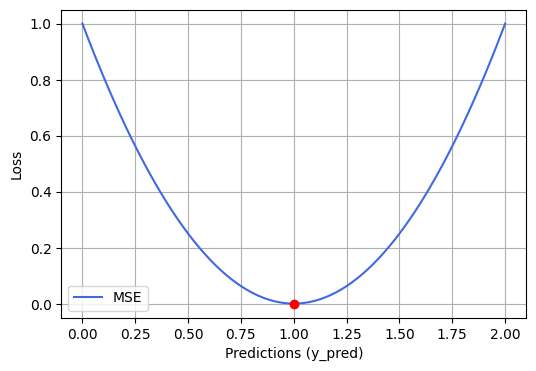

In [45]:
y_true = 1
y_pred = np.linspace(0, 2, 100)

mse = (y_pred - y_true) ** 2

min_x = y_true
min_y = 0

plt.figure(figsize=(6,4))
plt.plot(y_pred, mse, label="MSE", color='royalblue')
plt.scatter(min_x, min_y, color='red', zorder=5)
plt.xlabel("Predictions (y_pred)")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

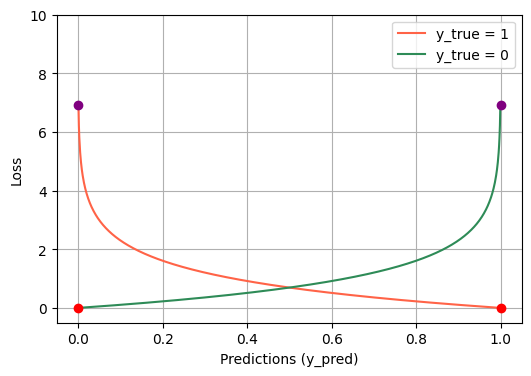

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y_pred = np.linspace(0.001, 0.999, 1000)

bce_true1 = -np.log(y_pred)
bce_true0 = -np.log(1 - y_pred)

min_x1, min_y1 = 1, 0
min_x0, min_y0 = 0, 0
max_x1, max_y1 = 0, bce_true1[0]
max_x0, max_y0 = 1, bce_true0[-1]

plt.figure(figsize=(6,4))
plt.plot(y_pred, bce_true1, label="y_true = 1", color='tomato')
plt.plot(y_pred, bce_true0, label="y_true = 0", color='seagreen')

# Evidenzia punti
plt.scatter([min_x1, min_x0], [min_y1, min_y0], color='red', zorder=5)
# i punti viola evidenziano i punti con l'errore massimo (e.g. per una classe la predizione della classe opposta)
plt.scatter([max_x1, max_x0], [max_y1, max_y0], color='purple', zorder=5)

plt.xlabel("Predictions (y_pred)")
plt.ylabel("Loss")
plt.ylim(-0.5, 10)
plt.grid(True)
plt.legend()
plt.show()

In [47]:
import numpy as np

In [ ]:
def relu(x):
    return np.maximum(x, 0)

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1-np.tanh(x)**2

def relu_prime(x):
    return np.maximum(x, 0)

def sigmoid(x):
    v = np.nan_to_num(np.exp(-x))
    return 1 / (1 + v)

def sigmoid_prime(x):
    v = np.nan_to_num(np.exp(-x))
    return np.nan_to_num(v / (1 + v)**2)

In [49]:
class FCLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(input_size, output_size) / np.sqrt(input_size + output_size)
        self.bias = np.random.randn(1, output_size) / np.sqrt(input_size + output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias

    def backward(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)

        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

class ActivationLayer:
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(input)

    def backward(self, output_error, learning_rate):
      return output_error * self.activation_prime(self.input)

class SoftmaxLayer:
    def __init__(self, input_size):
        self.input_size = input_size

    def forward(self, input):
        self.input = input
        tmp = np.nan_to_num(np.exp(input))
        self.output = tmp / np.sum(tmp)
        return self.output

    def backward(self, output_error, learning_rate):
        input_error = np.zeros(output_error.shape)
        out = np.tile(self.output.T, self.input_size)
        return self.output * np.dot(output_error, np.identity(self.input_size) - out)

class Network():
  def __init__(self):
        self.layers = []

  def add(self, layer):
      self.layers.append(layer)

  def set_loss(self, loss, loss_prime):
      self.loss = loss
      self.loss_prime = loss_prime

  def predict(self, input_data):
      samples = len(input_data)
      result = []

      for i in range(samples):
          output = input_data[i]
          for layer in self.layers:
              output = layer.forward(output)
          result.append(output)

      return result

  def fit(self, x_train, y_train, epochs, learning_rate):
        samples = len(x_train)

        for i in range(epochs):
            err = 0
            for j in range(samples):
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward(output)

                err += self.loss(y_train[j], output)

                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward(error, learning_rate)

            err /= samples
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))

### 🔢 Coding: Loss functions and its derivatives

In [50]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

def binary_cross_entropy(y_true, y_pred, epsilon=1e-12):
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    bce = - np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return bce

def binary_cross_entropy_derivative(y_true, y_pred, epsilon=1e-12):
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    derivative = -(y_true / y_pred) + (1 - y_true) / (1 - y_pred)
    return derivative

### Binary-cross entropy

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()


train_filter = np.where((y_train == 0 ) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]


x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
y_train = to_categorical(y_train)

x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test)

net = Network()
net.add(FCLayer(28*28, 100))
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(100, 50))
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(50, 2))
net.add(ActivationLayer(sigmoid, sigmoid_prime))

net.set_loss(binary_cross_entropy, binary_cross_entropy_derivative)
net.fit(x_train[0:1000], y_train[0:1000], epochs=15, learning_rate=0.001)

out = net.predict(x_test[0:3])
print("\n")
print("predicted values : ")
print(out, end="\n")
print("true values : ")
print(y_test[0:3])

epoch 1/15   error=0.623651
epoch 2/15   error=0.435158
epoch 3/15   error=0.278862
epoch 4/15   error=0.063129
epoch 5/15   error=0.014533
epoch 6/15   error=0.010962
epoch 7/15   error=0.008618
epoch 8/15   error=0.006729
epoch 9/15   error=0.005137
epoch 10/15   error=0.003930
epoch 11/15   error=0.003089
epoch 12/15   error=0.002577
epoch 13/15   error=0.002189
epoch 14/15   error=0.001862
epoch 15/15   error=0.001533


predicted values : 
[array([[8.89473505e-05, 9.99858657e-01]]), array([[9.99999617e-01, 3.71876759e-07]]), array([[7.83150368e-06, 9.99985688e-01]])]
true values : 
[[0. 1.]
 [1. 0.]
 [0. 1.]]


# 📕 Exercise

Starting from the basic elements defined above play with Neural Networks.  

*   Create a network with multiple layers and activation functions.
*   Train the network with proper loss function.
*   Monitor the performance on a test set
*   ❓ Add a validation set and monitor validation and loss during training of the model (optional)



## Load Dataset

In [53]:
from keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

train_filter = np.where((y_train == 0 ) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
y_train = to_categorical(y_train)

x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test)

fashion_net = Network()
fashion_net.add(FCLayer(28*28, 128))
fashion_net.add(ActivationLayer(relu, relu_prime))
fashion_net.add(FCLayer(128, 64))
fashion_net.add(ActivationLayer(relu, relu_prime))
fashion_net.add(FCLayer(64, 2))
fashion_net.add(ActivationLayer(sigmoid, sigmoid_prime))

net.set_loss(binary_cross_entropy, binary_cross_entropy_derivative)
net.fit(x_train[0:1000], y_train[0:1000], epochs=15, learning_rate=0.001)

out = net.predict(x_test[0:3])
print("\n")
print("predicted values : ")
print(out, end="\n")
print("true values : ")
print(y_test[0:3])

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
epoch 1/15   error=0.335861
epoch 2/15   error=0.100007
epoch 3/15   error=0.086680
epoch 4/15   error=0.074001
epoch 5/15   error=0.066503
epoch 6/15   error=0.061512
epoch 7/15   error=0.057717
epoch 8/15   error=0.054653
epoch 9/15   error=0.052082
epoch 10/15   error=0.049850
epoch 11/15   error=0.047987
epoch 12/15   error=0.046317
epoch 13/15   error=0.044744
epoch 14/15   error=0.043167
epoch 15/15   error=0.040750


predicted values : 
[array([[3.63315286e-04, 9.99698960e-01]]), array([[4.08721159e-04, 9.99594336e-01]]), array([[0.00272844, 0.9975041 ]])]
true values : 
[[0. 1.]
 [0. 1.]
 [0. 1.]]
